### Dataset 2 - Wine

This dataset is related to red and white vinho verde wine samples, from the north of Portugal. 
https://archive.ics.uci.edu/ml/datasets/Wine+Quality

#### Problem 
The goal is to model wine quality based on physicochemical tests. Based on the input data from 11 features of chemical properties, an output quality score from 0 to 10 is assigned to each instance. We would formulate this in terms of a regression problem where we attempt to arrive at a quality rating based on input chemical data.

#### Extending the problem
If we could somehow get measures of wines from outside of this dataset would could come up with an interesting and useful regression based algorithm.

### Dataset Description

### Loading the Dataset
This dataset is stored between two .csv files for red and white wines. We first need to extract this data into a workable format.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

red_filedata = np.genfromtxt('./data/Wine/winequality-red.csv', delimiter=';', skip_header=1)
white_filedata = np.genfromtxt('./data/Wine/winequality-white.csv', delimiter=';', skip_header=1)

# Transpose so that features are along the rows and data points are along the columns
red_filedata = red_filedata.transpose()
white_filedata = white_filedata.transpose()

# Extract the targets and separate into vector
red_targets = red_filedata[11:,:]
red_data = red_filedata[:11,:]
white_targets = white_filedata[11:,:]
white_data = white_filedata[:11,:]

# Dataset is now split and ready for analysis
print (red_data.shape)
print (red_targets.shape)
print (white_data.shape)
print (white_targets.shape)

(11, 1599)
(1, 1599)
(11, 4898)
(1, 4898)


### Analysing our Cleaned Data

This dataset required very minimal adjustment, thanks to numpy. For this dataset, our goal is to fit a regression models off of the various chemical features described above, and arrive at some overall quality score for each wine. The targets are given by the data set, and we can attempt to arrive at these using our regression models.
These are the 3 methods that will be used, along with the group member responsible for that method:
- Linear Regression - Brooks Tawil
- Regression Method 2 - Jack Chui
- Regression Method 3 - Gavin Mckim

### Linear Regression - Brooks Tawil

Linear regression is a simple and easy regression method that can be used here. Across our 11 features we can fit a regression model. We will be doing this for both the red and white wine datasets. For linear regression it follows that:

Useful link: https://medium.com/@andrew.chamberlain/the-linear-algebra-view-of-least-squares-regression-f67044b7f39b

We first need to find our weights using the derived equation:

${\dot{w} = (X^TX)^{-1}X^T Y}$

Where Y is our target values and X is our feature matrix

In [2]:
# Append a row of 1s for our linear regression
red_X = np.append(red_data, np.ones((red_data.shape[1], 1)).transpose(), axis=0).T
red_Y = np.array(red_targets).T

white_X = np.append(white_data, np.ones((white_data.shape[1], 1)).transpose(), axis=0).T
white_Y = np.array(white_targets).T

Setting up the k-folds cross validation involves segmenting our data into folds. I selected k=16 as that would allow for 100 values in each fold, a nice even number.

In [3]:
# Will run a k-folds cross validation with k=16, giving folds of 100 values each
k = 16
white_errors = []
red_errors = []
white_w_s = []
red_w_s = []
count = 0

# Allocate space for our folds and targets
white_folds = [[] for _ in range(k)]
white_targets = [[] for _ in range(k)]
red_folds = [[] for _ in range(k)]
red_targets = [[] for _ in range(k)]

# Assign indices to the data for shuffling
white_indices = []
red_indices = []
for i in range(len(white_X)):
    white_indices.append(i)
for i in range(len(red_X)):
    red_indices.append(i)
import random
random.shuffle(white_indices)
random.shuffle(red_indices)

# Split the data and targets into seperate blocks
for index in white_indices:    
    white_folds[count].append(white_X[index])
    white_targets[count].append(white_Y[index])
    count += 1
    if(count == k):
        count = 0
count = 0
for index in red_indices:    
    red_folds[count].append(red_X[index])
    red_targets[count].append(red_Y[index])
    count += 1
    if(count == k):
        count = 0

# Makes use of the Moore Penrose Inverse https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse

The data is now split into folds and can be used to fit linear models. We will first do so for the white wine dataset.

In [4]:
# Go through the folds of white wine data, form training and testing sets, fit a model, and calculate the error
for i in range(len(white_folds)):
    # Separate training_set
    training_set = []
    training_targets = []
    for j in range(len(white_folds)):
        if(i != j):
            for l in range(len(white_folds[j])):
                training_set.append(white_folds[j][l])
                training_targets.append(white_targets[j][l])
      
    # From the test_set
    test_set = np.array(white_folds[i])
    test_targets = np.array(white_targets[i])
    training_set = np.array(training_set)
    training_targets = np.array(training_targets)
    
    # Run the LS regression on the training sets to get a w
    w = np.linalg.inv(training_set.T @ training_set) @ training_set.T @ training_targets
    
    # Use the found w to calculate y' on the test set
    yHat = test_set @ w
    
    # Calculate the LS error 
    sumSquare = 0.0
    for j in range(len(test_set)):
        sumSquare += float(np.square(np.subtract(test_targets[i], yHat[i])))
    sumSquare = sumSquare/len(test_set)
        
    print ('Test Set ' + str(i) + ' Error: ' + str(sumSquare))
    white_errors.append(sumSquare)
    
    white_w_s.append(w)
    
print ('Errors: ' + str(white_errors))
print ('Average regression error: \t' + str(np.mean(white_errors)))

# Get the w that gives the smallest error
minError = np.inf
minError_index = 0
for i in range(len(white_errors)):
    if white_errors[i] < minError:
        minError = white_errors[i]
        minError_index = i

white_w_s = np.array(white_w_s) 
white_best_w = white_w_s[minError_index]

Test Set 0 Error: 0.5231552114137797
Test Set 1 Error: 0.579326170394743
Test Set 2 Error: 0.19200228054174878
Test Set 3 Error: 0.4456996850390326
Test Set 4 Error: 0.4628112835270323
Test Set 5 Error: 2.0074208706804106
Test Set 6 Error: 0.06379957057700024
Test Set 7 Error: 0.2672731494302198
Test Set 8 Error: 2.2300780224206744
Test Set 9 Error: 4.710338739733223
Test Set 10 Error: 0.017558006603022935
Test Set 11 Error: 0.48320316270077723
Test Set 12 Error: 0.17795302151315984
Test Set 13 Error: 0.12777995553197027
Test Set 14 Error: 2.3080274651000434
Test Set 15 Error: 0.34503497251645526
Errors: [0.5231552114137797, 0.579326170394743, 0.19200228054174878, 0.4456996850390326, 0.4628112835270323, 2.0074208706804106, 0.06379957057700024, 0.2672731494302198, 2.2300780224206744, 4.710338739733223, 0.017558006603022935, 0.48320316270077723, 0.17795302151315984, 0.12777995553197027, 2.3080274651000434, 0.34503497251645526]
Average regression error: 	0.9338413479827058


After running our cross validation, we have arrived at a weight vector $w$ that has been fit to our data. This w will now be used against the whole dataset so that we can report the regression error across the whole dataset.

In [5]:
# With the best w, run across the whole set like before and find the error
# Use the found w to calculate y' on the test set
yHat = white_X @ white_best_w

# Caluculate error using the best w
sumSquare = 0
for i in range(len(yHat)):
    sumSquare += np.square(np.subtract(yHat[i], white_Y[i]))
sumSquare = sumSquare/len(yHat)

print ('Weights: \n', white_best_w)
print ('Mean error using best w: ' + str(sumSquare))
print ()

Weights: 
 [[ 6.36432106e-02]
 [-1.82876406e+00]
 [ 2.18209943e-03]
 [ 8.00371707e-02]
 [-8.71288680e-02]
 [ 3.52157327e-03]
 [-2.95687346e-04]
 [-1.43812192e+02]
 [ 6.58389570e-01]
 [ 6.56749863e-01]
 [ 2.02714233e-01]
 [ 1.43758365e+02]]
Mean error using best w: [0.56325852]



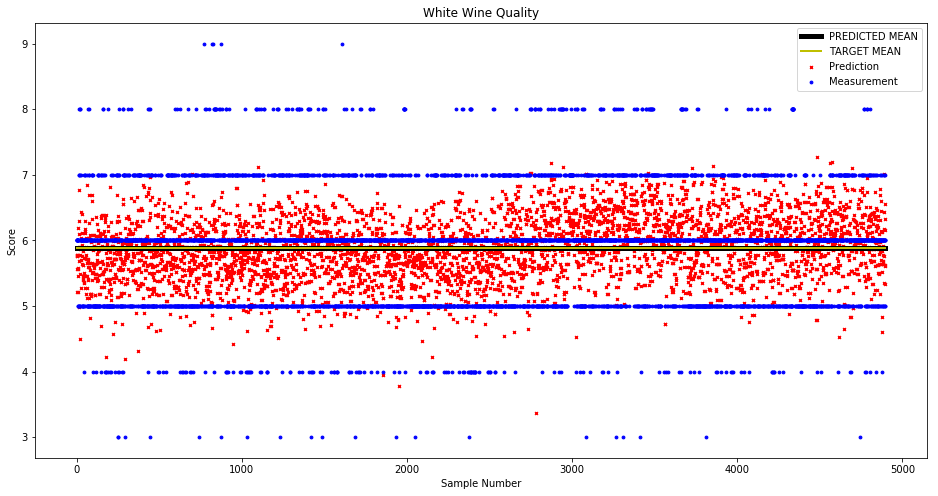

In [6]:
# Graph Sample Number vs. Score
# yHat is the Predicted
# white_Y is the Measured
x_axis = range(len(yHat))

# Plot of the white wine data
plt.figure(figsize=(16, 8))
plt.title('White Wine Quality')

plt.scatter(x_axis, yHat, s=8, color='r', marker='x')
plt.plot([0, x_axis[len(x_axis)-1]],[np.mean(yHat), np.mean(yHat)], color='k', linewidth=5)

plt.scatter(x_axis, white_Y, s=8, color='b', marker='o')
plt.plot([0, x_axis[len(x_axis)-1]],[np.mean(white_Y), np.mean(white_Y)], color='y', linewidth=2)

plt.legend(['PREDICTED MEAN', 'TARGET MEAN', 'Prediction', 'Measurement'])
plt.xlabel('Sample Number')
plt.ylabel('Score')
plt.show()

And now on the Red Wine set

In [7]:
# Go through the folds of red wine data, form training and testing sets, fit a model, and calculate the error
for i in range(len(red_folds)):
    # Separate training_set
    training_set = []
    training_targets = []
    for j in range(len(red_folds)):
        if(i != j):
            for l in range(len(red_folds[j])):
                training_set.append(red_folds[j][l])
                training_targets.append(red_targets[j][l])
      
    # From the test_set
    test_set = np.array(red_folds[i])
    test_targets = np.array(red_targets[i])
    training_set = np.array(training_set)
    training_targets = np.array(training_targets)
    
    # Run the LS regression on the training sets to get a w
    w = np.linalg.inv(training_set.T @ training_set) @ training_set.T @ training_targets
    
    # Use the found w to calculate y' on the test set
    yHat = test_set @ w
    
    # Calculate the LS error 
    sumSquare = 0.0
    for j in range(len(test_set)):
        sumSquare += float(np.square(np.subtract(test_targets[i], yHat[i])))
    sumSquare = sumSquare/len(test_set)
        
    print ('Test Set ' + str(i) + ' Error: ' + str(sumSquare))
    red_errors.append(sumSquare)
    
    red_w_s.append(w)
    
print ('Errors: ' + str(red_errors))
print ('Average regression error: \t' + str(np.mean(red_errors)))

# Get the w that gives the smallest error
minError = np.inf
minError_index = 0
for i in range(len(red_errors)):
    if red_errors[i] < minError:
        minError = red_errors[i]
        minError_index = i

red_w_s = np.array(red_w_s) 
red_best_w = red_w_s[minError_index]

# With the best w, run across the whole set like before and find the error
# Use the found w to calculate y' on the test set
yHat = red_X @ red_best_w

# Caluculate error using the best w
sumSquare = 0
for i in range(len(yHat)):
    sumSquare += np.square(np.subtract(yHat[i], red_Y[i]))
sumSquare = sumSquare/len(yHat)

print ('Weights: \n', red_best_w)
print ('Mean error using best w: ' + str(sumSquare))
print ()

Test Set 0 Error: 0.7108699164255099
Test Set 1 Error: 0.8576073783025607
Test Set 2 Error: 0.06183166428441627
Test Set 3 Error: 0.18046601618272487
Test Set 4 Error: 0.17009886461353
Test Set 5 Error: 0.40012668261264894
Test Set 6 Error: 0.016829874134727026
Test Set 7 Error: 1.13154221313141
Test Set 8 Error: 0.004890995145076735
Test Set 9 Error: 0.10970132631529611
Test Set 10 Error: 0.03390492164542949
Test Set 11 Error: 0.22379733546755273
Test Set 12 Error: 0.022073685128826636
Test Set 13 Error: 0.2167165382336054
Test Set 14 Error: 0.10501997075986334
Test Set 15 Error: 0.1739997043597037
Errors: [0.7108699164255099, 0.8576073783025607, 0.06183166428441627, 0.18046601618272487, 0.17009886461353, 0.40012668261264894, 0.016829874134727026, 1.13154221313141, 0.004890995145076735, 0.10970132631529611, 0.03390492164542949, 0.22379733546755273, 0.022073685128826636, 0.2167165382336054, 0.10501997075986334, 0.1739997043597037]
Average regression error: 	0.2762173179214301
Weights: 

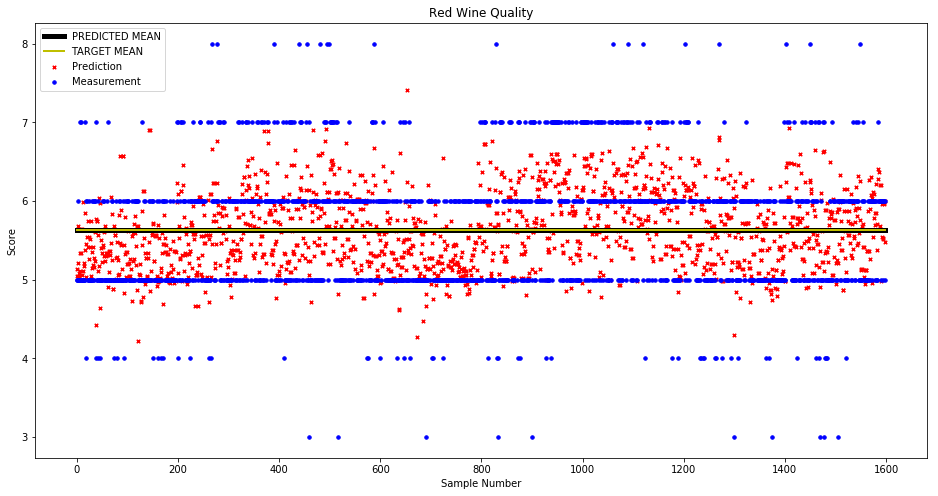

In [8]:
# Graph Sample Number vs. Score
# yHat is the Predicted
# red_Y is the Measured
x_axis = range(len(yHat))

# Plot of the white wine data
plt.figure(figsize=(16, 8))
plt.title('Red Wine Quality')

plt.scatter(x_axis, yHat, s=12, color='r', marker='x')
plt.plot([0, x_axis[len(x_axis)-1]],[np.mean(yHat), np.mean(yHat)], color='k', linewidth=5)

plt.scatter(x_axis, red_Y, s=12, color='b', marker='o')
plt.plot([0, x_axis[len(x_axis)-1]],[np.mean(red_Y), np.mean(red_Y)], color='y', linewidth=2)

plt.legend(['PREDICTED MEAN', 'TARGET MEAN', 'Prediction', 'Measurement'])
plt.xlabel('Sample Number')
plt.ylabel('Score')
plt.show()